# Exploratory Data Analysis - Forecasting Product Demand for Retailers
**Author:** Ryan Krabbe  
**Date:** 7/14/2025

**Objective:** Accurately forecast product demand using product features from a bakery distributor's data


## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first few rows

In [6]:
# Load the data
df = pd.read_csv("train_clean.csv")

# Display the first few rows
df.head()

,Week,Agency_ID,Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Units_Sold,Weekly_Sales_Price,Dev_uni_proxima,Dev_proxima,Unit_Demand
0,4,1441,1,5533,7701781,45111,4,35.92,0,0.0,4
1,6,2229,1,1101,312220,3270,7,73.29,0,0.0,7
2,7,1945,1,8013,877789,2425,15,67.50,0,0.0,15
3,6,2012,1,1159,7878703,1309,3,20.28,0,0.0,3
4,5,2054,1,1125,283175,47840,10,80.00,0,0.0,10


### 1.2 Check for missing values and display summary statistics

In [7]:
# Get a summary of the dataset
df.info()

# Check for any missing values
df.isnull().sum()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                10000 non-null  int64  
 1   Agency_ID           10000 non-null  int64  
 2   Channel_ID          10000 non-null  int64  
 3   Route_ID            10000 non-null  int64  
 4   Client_ID           10000 non-null  int64  
 5   Product_ID          10000 non-null  int64  
 6   Weekly_Units_Sold   10000 non-null  int64  
 7   Weekly_Sales_Price  10000 non-null  float64
 8   Dev_uni_proxima     10000 non-null  int64  
 9   Dev_proxima         10000 non-null  float64
 10  Unit_Demand         10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


,Week,Agency_ID,Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Units_Sold,Weekly_Sales_Price,Dev_uni_proxima,Dev_proxima,Unit_Demand
count,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.913500,2590.557400,1.37590,2110.096600,1.810038e+06,20681.211400,7.157600,69.042987,0.137200,1.365616,7.065200
std,2.023864,4181.264893,1.43903,1501.680689,1.856779e+06,18671.464626,21.009453,374.385980,2.760894,21.629168,20.676927
min,3.000000,1110.000000,1.00000,9.000000,2.103000e+03,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1312.000000,1.00000,1160.000000,3.564202e+05,1242.000000,2.000000,16.760000,0.000000,0.000000,2.000000
50%,6.000000,1614.000000,1.00000,1276.000000,1.203460e+06,30532.000000,3.000000,30.000000,0.000000,0.000000,3.000000
75%,8.000000,2038.000000,1.00000,2802.000000,2.380932e+06,37361.000000,6.000000,55.840000,0.000000,0.000000,6.000000
max,9.000000,25759.000000,11.00000,9824.000000,9.829637e+06,49973.000000,897.000000,19470.080000,200.000000,1500.120000,897.000000


## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

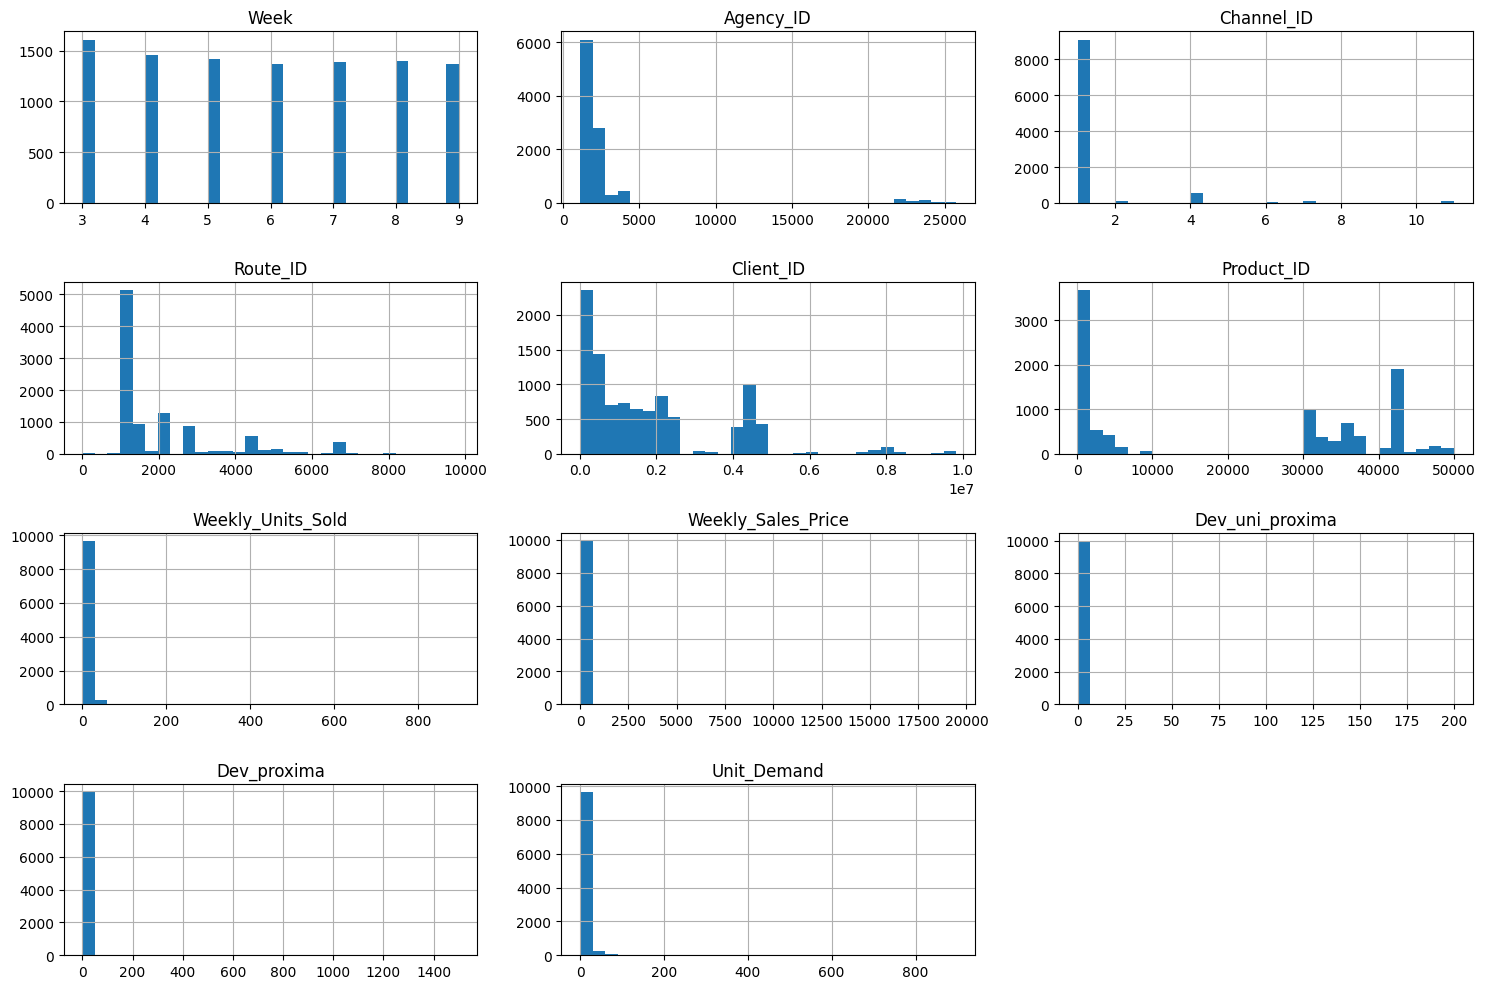

In [8]:
# Histogram of numerical features
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [9]:
# Unique value counts
df['Agency_ID'].nunique(), df['Client_ID'].nunique(), df['Product_ID'].nunique()

(446, 9875, 530)

Text(0.5, 1.0, 'Top 10 Most Frequent Products')

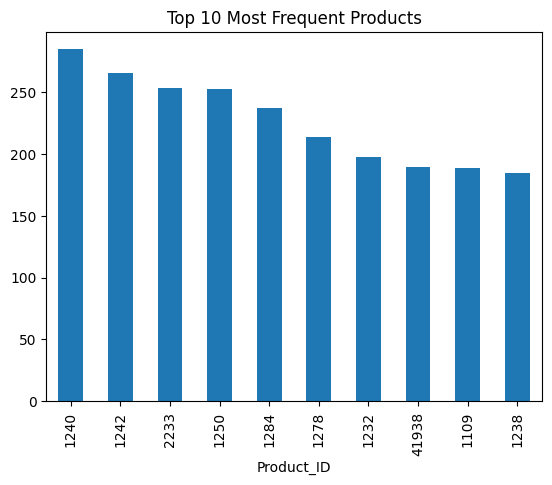

In [10]:
# Top 10 products by frequency
df['Product_ID'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Products")

Text(0.5, 1.0, 'Correlation Matrix')

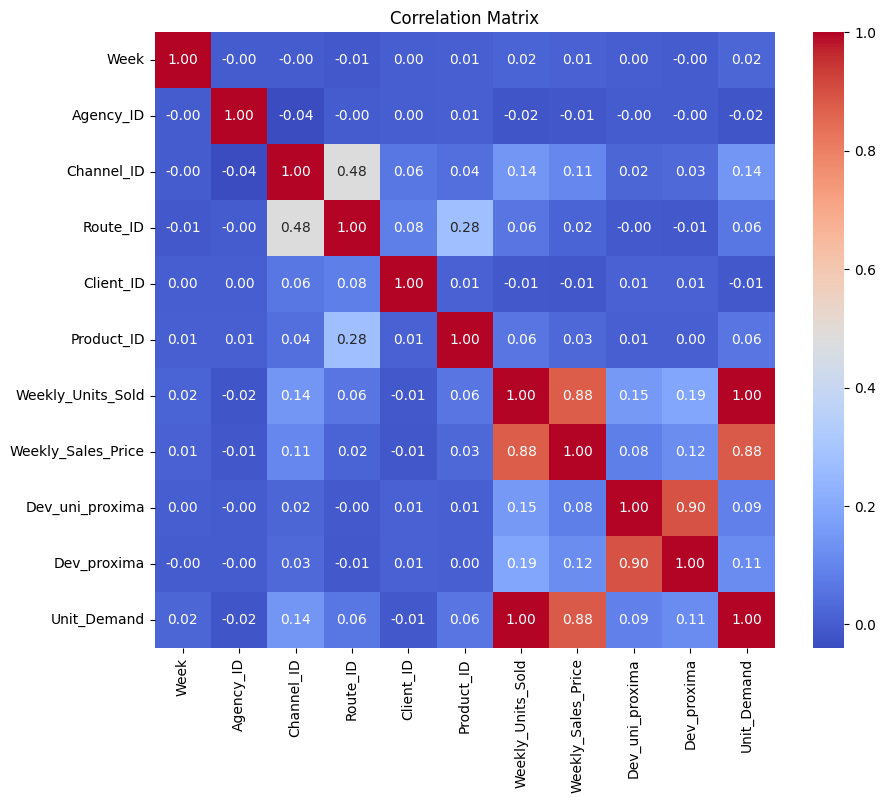

In [11]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")

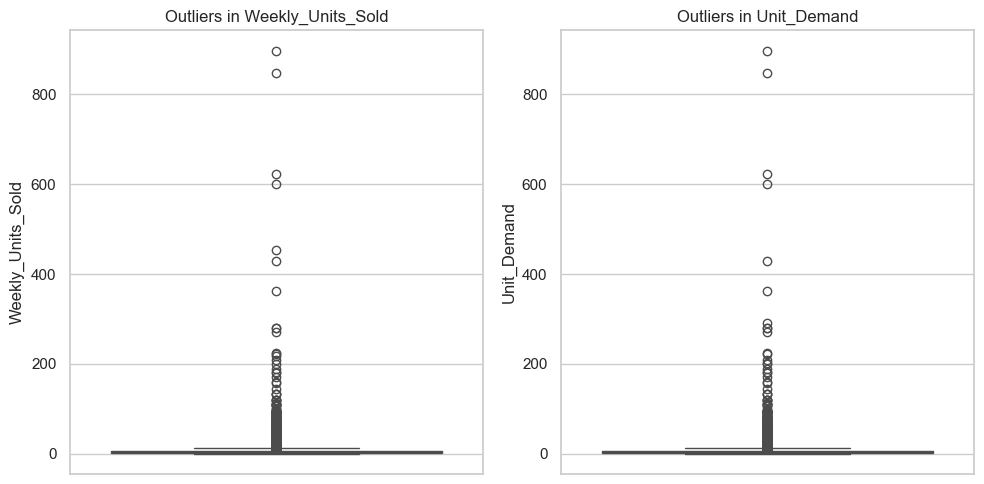

In [12]:
# Use box plots to detect outliers

# Set style
sns.set(style="whitegrid")

# Plot boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Weekly_Units_Sold"])
plt.title("Outliers in Weekly_Units_Sold")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Unit_Demand"])
plt.title("Outliers in Unit_Demand")

plt.tight_layout()
plt.show()

## Reflection
- Using histograms to explore the distribution of each feature revealed that most of the variables are heavily right-skewed, with long tails indicating potential extreme values or outliers. Features such as `Weekly_Units_Sold`, `Weekly_Sales_Price` and `Unit_Demand` show very high skewness.
- The top 10 most frequently sold products reveal which SKU's are heavily involved in the sales landscape and can be used for forecasting.
- Through the correlation heatmap, `Weekly_Units_Sold` and `Weekly_Sales_Price` show high positive correlations with `Unit_Demand`, suggesting these variables could be useful in the model forecasting.
- Box plots confirmed the prescence of outliers in the sales and demand figures, which is useful information for the upcoming modeling.
- The EDA performed gave me insight into the patterns, skewness, and correlations within the dataset. It will provide a strong starting point to accurately forecast demand using `Unit_Demand`.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

- Since I'm trying to accurately forecast product demand using sales data the target variable that I'm going to work with is `Unit_Demand`
- Below are the input features that I'm going to work with
    - `Agency_ID` - Sales depot ID
    - `Channel_ID` - Sales channel ID
    - `Route_ID` - Route ID assigned to the salesperson
    - `Client_ID` - Unique client ID
    - `Product_ID` - Unique product ID
    - `Weekly_Units_Sold` - Units sold this week
    - `Weekly_Sales_Price` - Sales price this week

### 3.2 Define X and y

In [79]:
# Define target variable
y = df['Unit_Demand']

# Define features by dropping the target and any irrelevant columns
X = df.drop(['Unit_Demand', 'Week', 'Dev_proxima', 'Dev_uni_proxima'], axis=1)

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split.

In [80]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4.2 Train model using Scikit-Learn model.fit() method

In [81]:
from sklearn.linear_model import LinearRegression

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# print to get rid of HTML representation error
print(lr_model)

LinearRegression()


### 4.3 Evalulate performance of Linear Regression Model

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate Performance
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Regressor Results")
print(f"R² Score: {lr_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${lr_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${lr_rmse:,.2f}")

Linear Regression Regressor Results
R² Score: 0.9123
Mean Absolute Error (MAE): $0.23
Root Mean Squared Error (RMSE): $3.76


### 4.4 Random Forest Model

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# print to get rid of HTML representation error
print(rf_model)

RandomForestRegressor(random_state=42)


In [84]:
# Make predictions on the test data
rf_preds = rf_model.predict(X_test)

# Evaluate Performance
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("Random Forest Regressor Results")
print(f"R² Score: {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rf_rmse:.2f}")

Random Forest Regressor Results
R² Score: 0.9479
Mean Absolute Error (MAE): $0.26
Root Mean Squared Error (RMSE): $2.90


### 4.5 Gradient Boosting Model

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# print to get rid of HTML representation error
print(gb_model)

GradientBoostingRegressor(random_state=42)


In [86]:
# Make predictions on the test data
gb_preds = gb_model.predict(X_test)

# Evaluate Performance
gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

print("\nGradient Boosting Regressor Results")
print(f"R² Score: {gb_r2:.4f}")
print(f"Mean Absolute Error (MAE): ${gb_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${gb_rmse:.2f}")


Gradient Boosting Regressor Results
R² Score: 0.9637
Mean Absolute Error (MAE): $0.23
Root Mean Squared Error (RMSE): $2.42


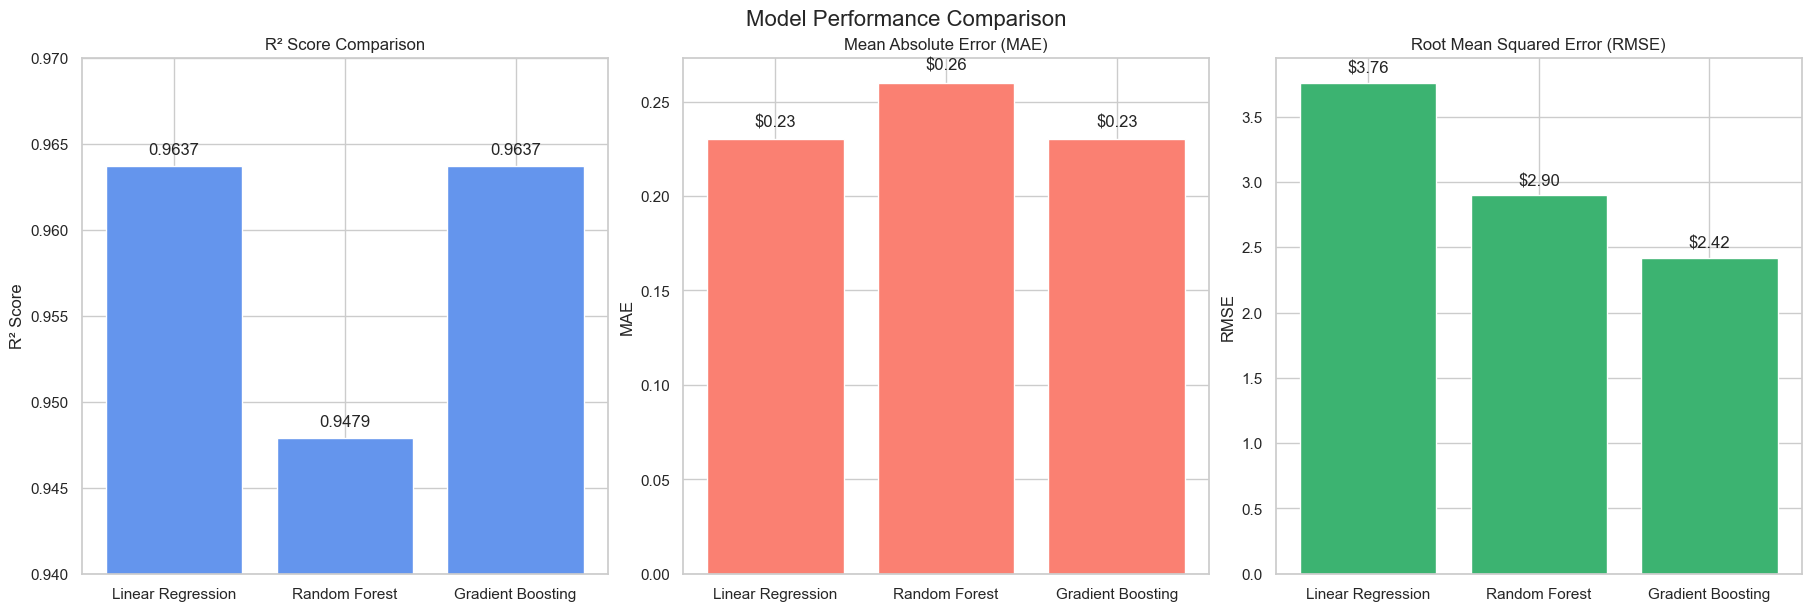

In [102]:
# Models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Modeling Scores
r2_scores = [0.9637, 0.9479, 0.9637]
mae_scores = [0.23, 0.26, 0.23]
rmse_scores = [3.76, 2.90, 2.42]

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot R²
axes[0].bar(models, r2_scores, color='cornflowerblue')
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0.94, 0.97)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

# Plot MAE
axes[1].bar(models, mae_scores, color='salmon')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
for i, v in enumerate(mae_scores):
    axes[1].text(i, v + 0.005, f"${v:.2f}", ha='center', va='bottom')

# Plot RMSE
axes[2].bar(models, rmse_scores, color='mediumseagreen')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    axes[2].text(i, v + 0.05, f"${v:.2f}", ha='center', va='bottom')

plt.savefig("model_performance_comparison.png", dpi=300)
plt.show()

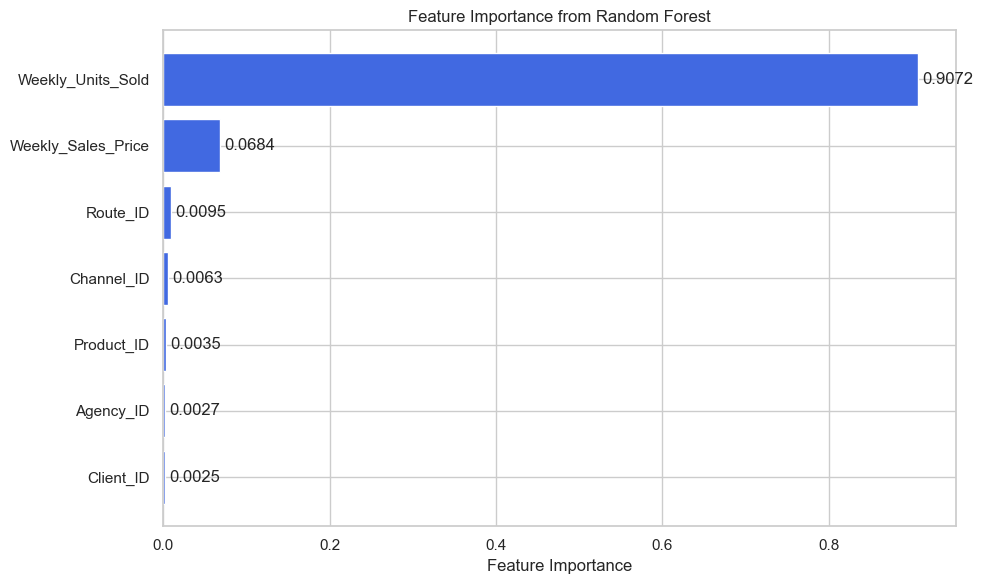

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Filter out zero-importance features
nonzero_indices = [i for i in indices if importances[i] > 0]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(nonzero_indices)),
                [importances[i] for i in nonzero_indices],
                align='center', color='royalblue')
plt.yticks(range(len(nonzero_indices)), [features[i] for i in nonzero_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center')

plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


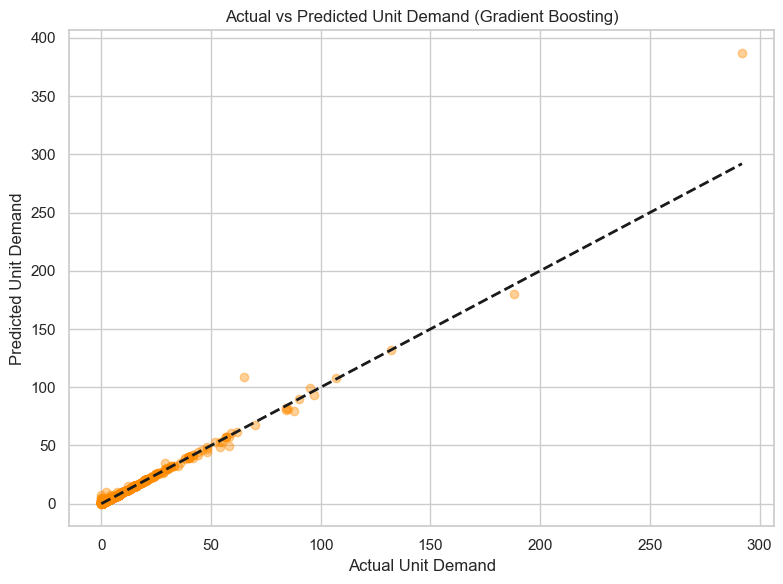

In [109]:
# Plot actual vs predicted values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, alpha=0.4, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Unit Demand")
plt.ylabel("Predicted Unit Demand")
plt.title("Actual vs Predicted Unit Demand (Gradient Boosting)")
plt.tight_layout()
plt.savefig("actual_vs_predicted_gb.png")
plt.show()

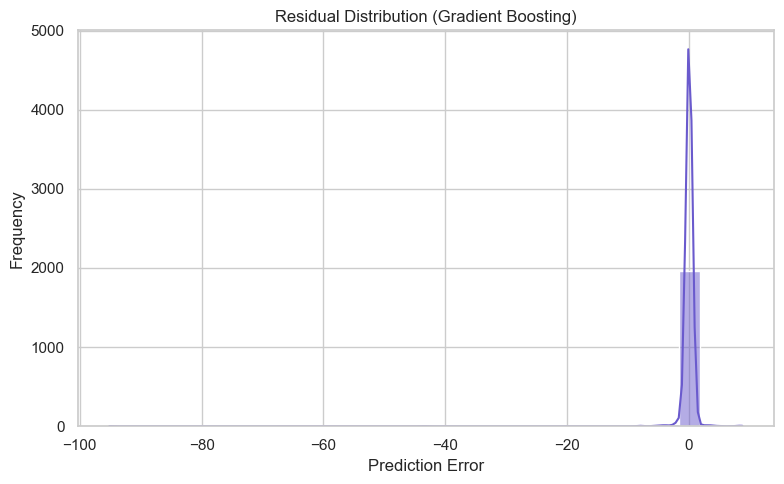

In [110]:
# Calculate residuals
residuals = y_test - gb_preds

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='slateblue')
plt.title("Residual Distribution (Gradient Boosting)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("residual_distribution.png")
plt.show()